## Session 4 - Convolutional kernels - blurring and thresholds

In [ ]:
# sudo apt-get update
# sudo apt-get install -y python3-opencv
# pip install opencv-python matplotlib

In [1]:
import os
import glob
import sys
sys.path.append("..")

# Image processing and numerical tools
import cv2 # openCV
import numpy as np

# class utils functions
from utils.imutils import jimshow as show
from utils.imutils import jimshow_channel as show_channel
import matplotlib.pyplot as plt

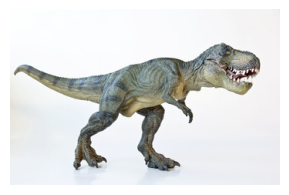

In [4]:
filepath = os.path.join("..",
                        "..",
                        "..",
                        "cds-vis-data",
                        "data", 
                        "img",
                        "trex.png")

image = cv2.imread(filepath)
show(image)

### Blurring with convolutional kernels

In [ ]:
cv2.blur(image, (3,3)) # Blur image witg conv. kernel 3x3

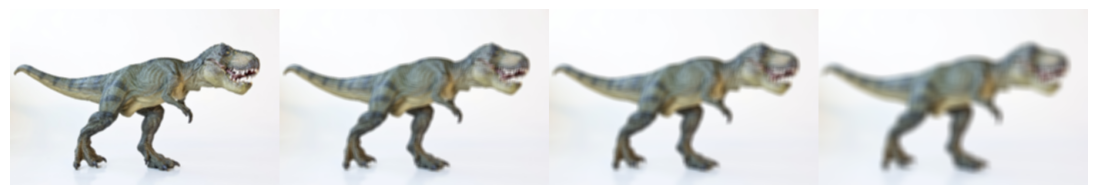

In [37]:
# The bigger the kernel, the more blurred the image will be
blurred_stack = np.hstack([
    cv2.blur(image, (3,3)),
    cv2.blur(image, (5,5)),
    cv2.blur(image, (7,7)),
    cv2.blur(image, (11, 11))
])

show(blurred_stack)

In [ ]:
cv2.medianBlur(image, 3, 3) # This function needs the kernel size to be integers

In [ ]:
show(cv2.GaussianBlur(image, (3,3), 0)) # This function requires a specified mean - here its just set to 0

### Thresholding

In [40]:
image = cv2.imread(filepath) # Load image again to make sure, that I havent modified it

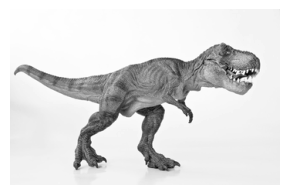

In [44]:
# Converting to grayscale
grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
show_channel(grey)

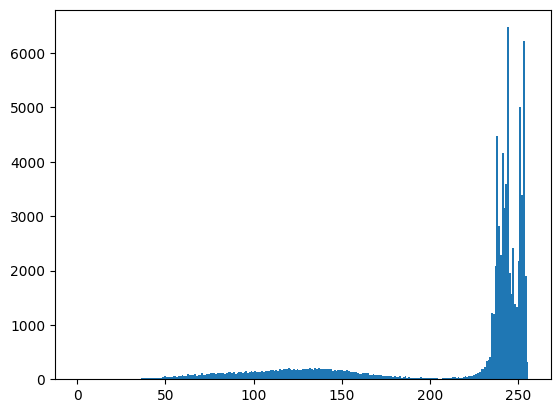

In [51]:
# Plot histogram of the grayscaled image to set the threshold
plt.hist(grey.flatten(), 255, [0,256])
plt.show() 

# We have a lot of while in the image - see spiked in higher end of the grayscale channel
# Around 200 it seems that there is some sort of transition

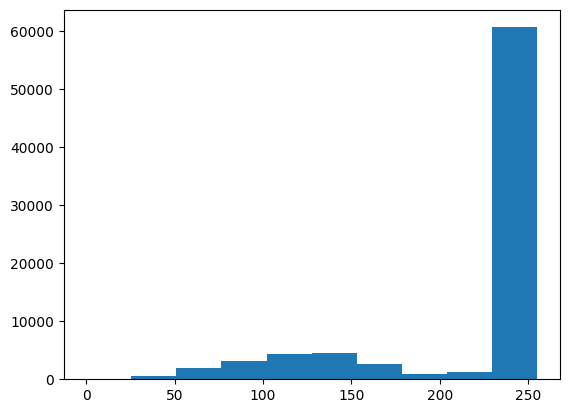

In [52]:
plt.hist(grey.flatten(), 10)
plt.show() 

# Low point between 175:200 --> around 200 might be the "sweat spot"

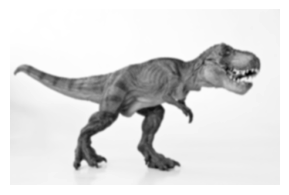

In [54]:
blurred = cv2.GaussianBlur(grey, (5,5), 0)
show_channel(blurred)

<function matplotlib.pyplot.show(close=None, block=None)>

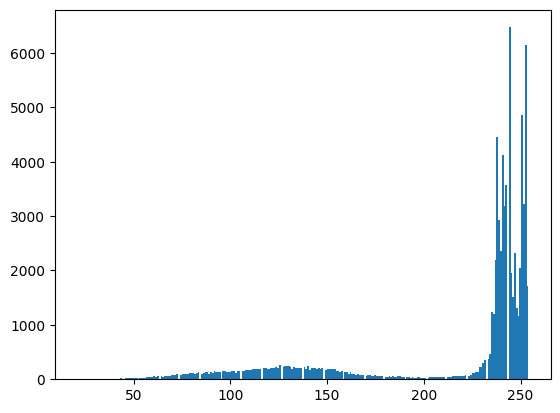

In [56]:
# Plot a hist of the blurred image
plt.hist(blurred.flatten(), 255)
plt.show

In [83]:
threshold_val, binary_image = cv2.threshold(blurred, 200, 255, cv2.THRESH_BINARY)
 
# 200 = pixel threshold value
# Type of the output = tuple 

# THRESH_BINARY can be changed to THRESH_BINARY_INV, if we want the inverted result 
# --> and then we dont need to use cv2.bitwise_not later on

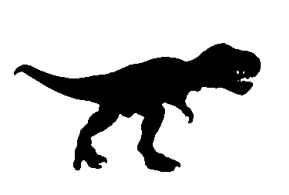

In [78]:
show_channel(binary_image)

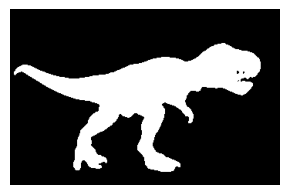

In [79]:
cv2.bitwise_not(binary_image) # We flip the array - all the 255 are changed to 0 and all 0 are changed to 255
show_channel(cv2.bitwise_not(binary_image))

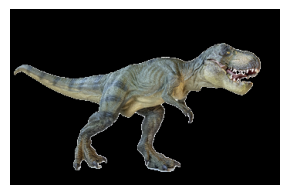

In [86]:
# We want to use the binary image as a mask to extract the trex

show(cv2.bitwise_and(image, image, mask = cv2.bitwise_not(binary_image)))

# image = source object
# image = destination
# mask = the inverted binary_image

### Sobel

In [89]:
# Sobel operatator
sobel_horizontal = cv2.Sobel(grey, cv2.CV_64F, 1, 0) # 1, 0 to indicate the horizontal kernel
sobel_vertical = cv2.Sobel(grey, cv2.CV_64F, 0, 1) # 0, 1 to indicate the vertical kernel

# cv2.CV_64F = defining the data type, that we are working with

In [ ]:
# We have to do this, as there is some limitations with the package ...
# If we dont include this step, two grey almost 3D looking images will be plotted

sobel_horizontal = np.uint8(np.absolute(sobel_horizontal))
sobel_vertical = np.uint8(np.absolute(sobel_vertical))

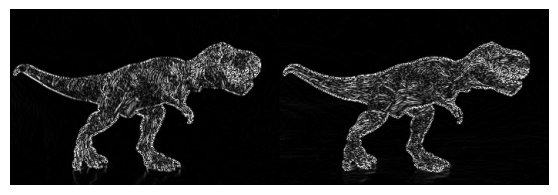

In [95]:
sobel_stack = np.hstack([sobel_horizontal, sobel_vertical])
show_channel(sobel_stack)

### Combine Sobel

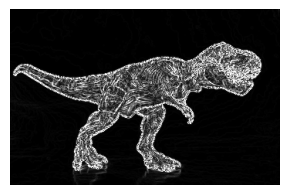

In [98]:
sobelCombined = cv2.bitwise_or(sobel_horizontal, sobel_vertical)
show_channel(sobelCombined)

# The OR operation is true when either pixel is greater than zero.